### **Proyecto Final- Predicción de Ventas Semanales de Walmart**

### *Planteamiento del problema*

En el presente trabajo final se poder predecir las ventas semanas en Walmart deacuerdo con el dataset que tenemos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"Walmart.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### *Limpieza de DataSet*

In [4]:
print(f'El número de filas es: {df.shape[0]}')
print(f'El número de columnas es: {df.shape[1]}')

El número de filas es: 6435
El número de columnas es: 8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

>- No Se cuenta con valores NaN

In [7]:
df.duplicated().sum()

0

>- No se cuenta con valores duplicados

## Análisis de los datos

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


>- Se puede observar la columna Date de tipo object la cual seria recomendable convertirla a tipo de dato date para luego generar nuevas columnas como año y mes

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

In [11]:
df['Año'] = df['Date'].dt.year.astype(str)   
df['Mes'] = df['Date'].dt.month.astype(str)

In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Año,Mes
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


>- Se puede observar que se tiene dos columnas nueva el cual es año y mes, a continación volveremos la columna Date a tipo str como estaba en un inicio

In [13]:
df['Date'] = df['Date'].dt.date.astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Año           6435 non-null   object 
 9   Mes           6435 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 502.9+ KB


**Analisi Estadistico**

In [15]:
df.describe().round(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


>- Se puede observar en nuestra columna Store que los datos van desde 1 hasta 45 y que el promedio es 23, por otra parte la columna Weekly_Sales son valores muy grandes , se podria decir que hay valores outliers y con respecto a las demas columnas se observar datos pequeños desde 0 hasta 227.23

In [16]:
import matplotlib.pyplot as plt

In [17]:
dt = df.select_dtypes(include='number')

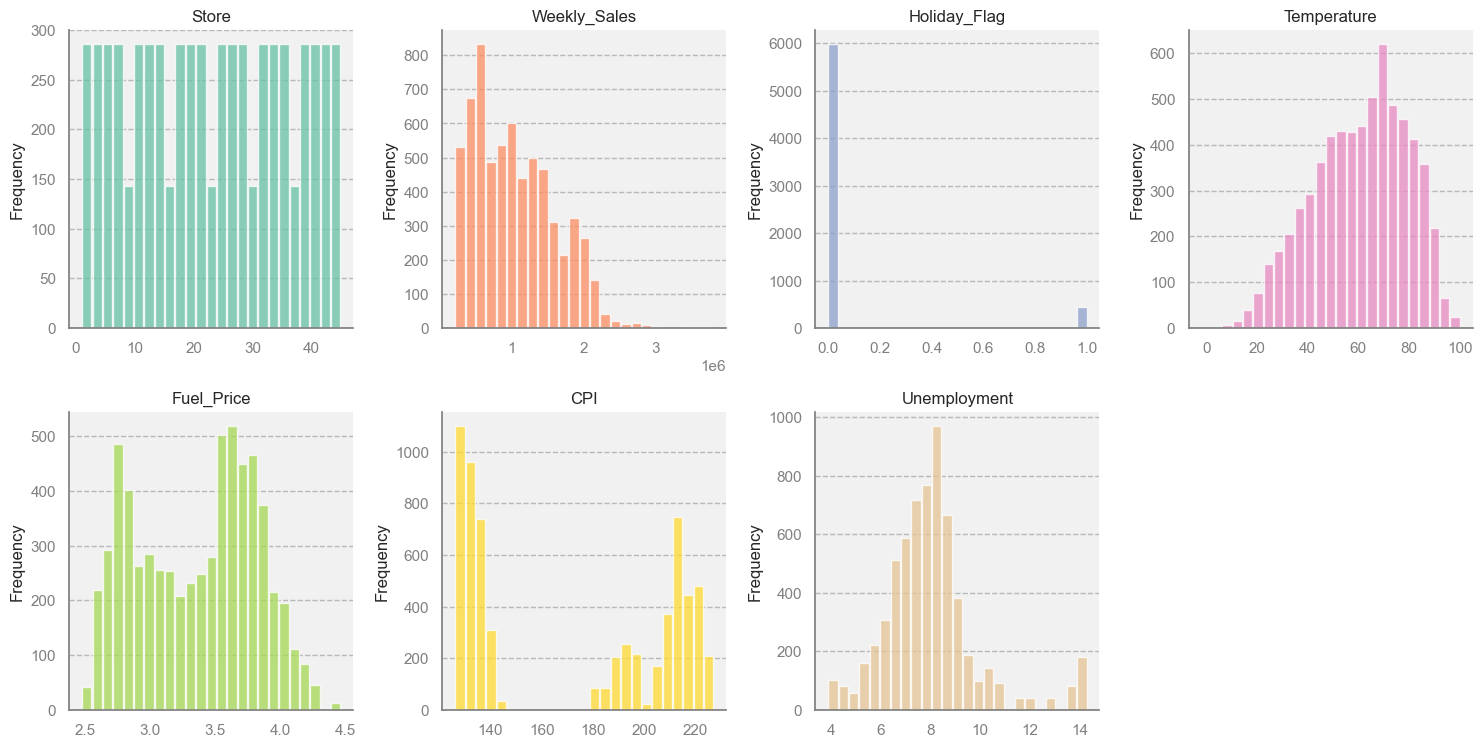

In [18]:
import seaborn as sns
sns.set(style="dark")
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15)) 
axes = axes.flatten()

colors = sns.color_palette("Set2", len(dt.columns))
for i, col in enumerate(dt.columns):
    if i < len(axes):  
        df[col].plot.hist(bins=25, ax=axes[i], color=colors[i], rwidth=0.9, alpha=0.75)
        axes[i].set_title(col, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', color='gray', alpha=0.5)
        axes[i].set_facecolor('#f1f1f1')
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_color('gray')
        axes[i].spines['bottom'].set_color('gray')
        axes[i].tick_params(axis='x', colors='gray')
        axes[i].tick_params(axis='y', colors='gray')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

>- Se puede observar que nuestras columnas númericas tiene valores pequeños y grandes , se realizara un analisis mejor

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Año           6435 non-null   object 
 9   Mes           6435 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 502.9+ KB


**Revisión de Outliers en Store**

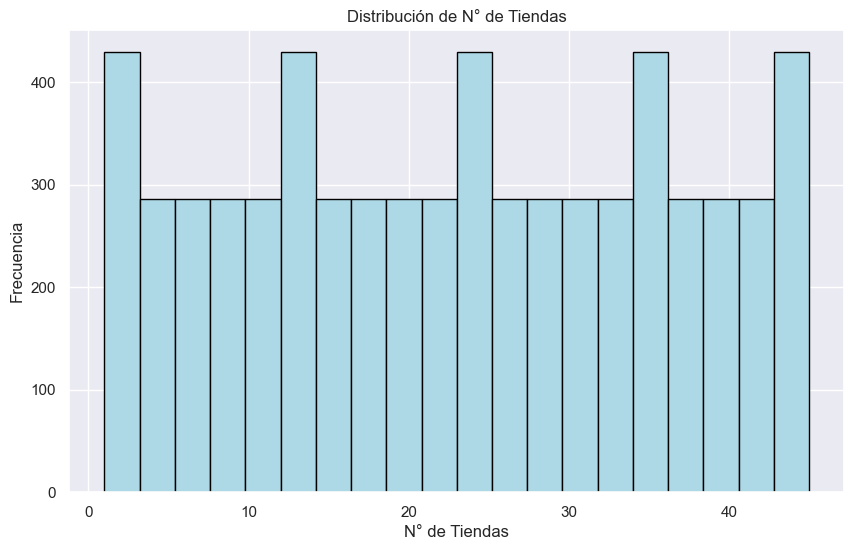

In [20]:
data = df["Store"]
plt.figure(figsize=(10, 6))  
plt.hist(data, bins=20, edgecolor="black", color ='lightblue')  

plt.title("Distribución de N° de Tiendas")
plt.xlabel("N° de Tiendas")
plt.ylabel("Frecuencia")

plt.grid(True)
plt.show()

In [21]:
import plotly.graph_objs as go
import plotly.subplots as sp


fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Store"))

fig.add_trace(go.Box(y=df['Store'], name='Store'), row=1, col=1)

fig.update_layout(
    title_text="Diagramas de caja N° de Tiendas",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se puede observar que no se tiene valores outliers en la columna Store

**Revisión de Outliers en Weekly_Sales**

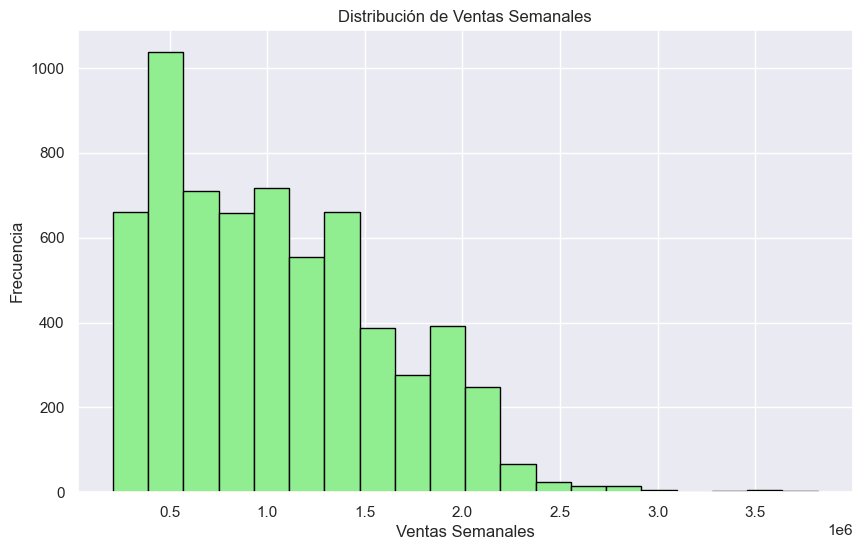

In [22]:
data = df["Weekly_Sales"]
plt.figure(figsize=(10, 6))  
plt.hist(data, bins=20, edgecolor="black", color ='lightgreen')  
plt.title("Distribución de Ventas Semanales")
plt.xlabel("Ventas Semanales")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [23]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Weekly_Sales"))
fig.add_trace(go.Box(y=df['Weekly_Sales'], name='Weekly_Sales'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja de Ventas Semanales",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se puede observar que se tiene valores outliers las cuales se recomienda eliminarlos

In [24]:
df[df['Weekly_Sales']>2727575].index

Index([ 189,  241,  471,  474,  475,  523,  526,  527,  761, 1329, 1332, 1333,
       1381, 1385, 1758, 1761, 1762, 1810, 1813, 1814, 1901, 1904, 1905, 1957,
       2759, 2761, 2762, 2763, 2811, 2814, 2815, 3192, 3764, 3816],
      dtype='int64')

In [25]:
df = df.drop(index = [189,  241,  471,  474,  475,  523,  526,  527,  761, 1329, 1332, 1333,
       1381, 1385, 1758, 1761, 1762, 1810, 1813, 1814, 1901, 1904, 1905, 1957,
       2759, 2761, 2762, 2763, 2811, 2814, 2815, 3192, 3764, 3816])

In [26]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Weekly_Sales"))
fig.add_trace(go.Box(y=df['Weekly_Sales'], name='Weekly_Sales'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja de Ventas Semanales",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se observa que no se tiene valores outliers en las ventas semanales

**Revisión de Outliers en Holiday_Flag**

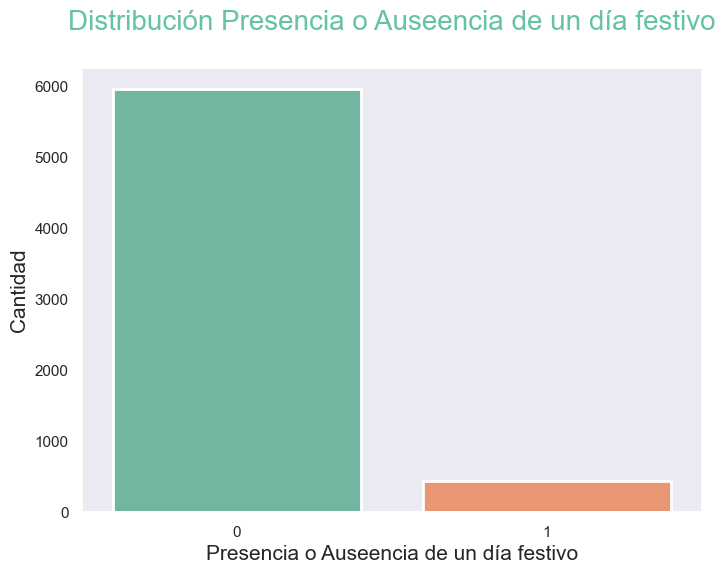

In [27]:
colors = sns.color_palette("Set2")[:2]
plt.figure(figsize=(8, 6))  
plt.subplots_adjust(top=0.85) 
plt.title("Distribución Presencia o Auseencia de un día festivo\n", fontsize=20, color=colors[0])
plt.xlabel("Presencia o Auseencia de un día festivo", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)
sns.countplot(
    x="Holiday_Flag",
    data=df,
    palette=colors,
    hue="Holiday_Flag", 
    dodge=False, 
    legend=False,  
    edgecolor="white", 
    linewidth=2, 
)
plt.xticks(rotation=0)
plt.show()

>- Se puede observar que se tiene solo valores de 0 y 1 y las cuales el que tiene mayor cantidad es el 0 es decir que hay ausencia de dias festivos en la gran mayoria

**Revisión de Outliers en Temperature**

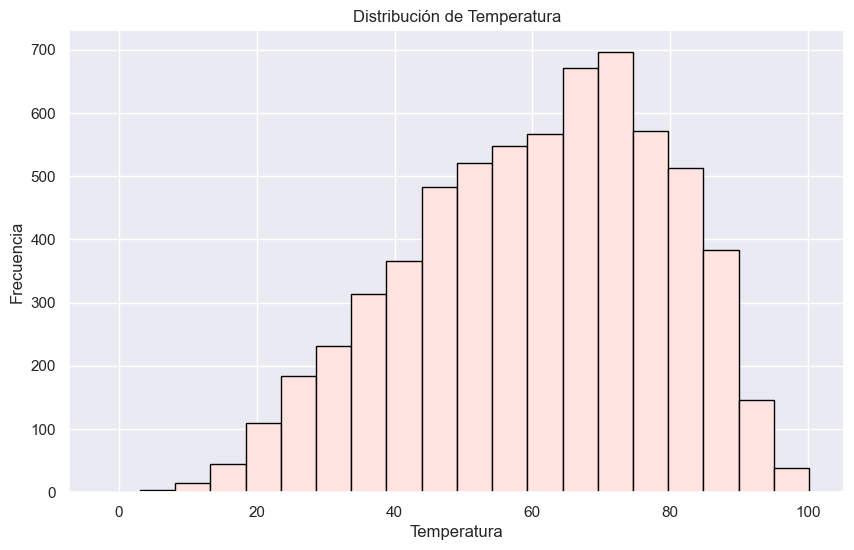

In [28]:
data = df["Temperature"]
plt.figure(figsize=(10, 6))  
plt.hist(data, bins=20, edgecolor="black", color ='mistyrose')  
plt.title("Distribución de Temperatura")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [29]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Temperature"))
fig.add_trace(go.Box(y=df['Temperature'], name='Temperature'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja de temperatura",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se puede observar que se cuenta con temperaturas a normales es decir otliers las cuales se recomienda eliminarlas

In [30]:
df[df['Temperature']<7].index

Index([910, 2336, 3626], dtype='int64')

In [31]:
df = df.drop(index = [910,2336, 3626])

In [32]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Temperature"))
fig.add_trace(go.Box(y=df['Temperature'], name='Temperature'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja de temperatura",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se observa que ya no se tiene valores outliers en la columna temperatura

**Revisión de Outliers en Fuel_Price**

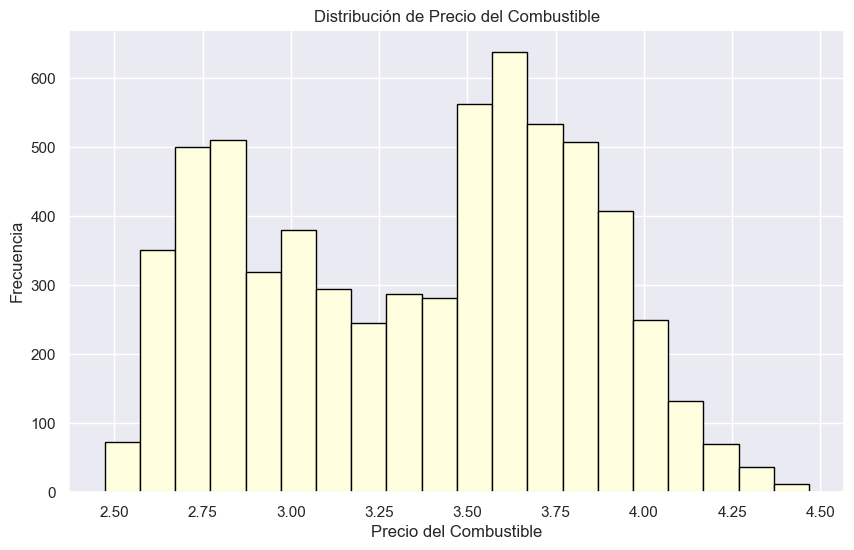

In [33]:
data = df["Fuel_Price"]
plt.figure(figsize=(10, 6))  
plt.hist(data, bins=20, edgecolor="black", color ='lightyellow')  
plt.title("Distribución de Precio del Combustible")
plt.xlabel("Precio del Combustible")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [34]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Fuel_Price"))
fig.add_trace(go.Box(y=df['Fuel_Price'], name='Fuel_Price'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja de precio del combustible",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se puede observar que no se tiene valores outliers en la columna Precio del Combustible

**Revisión de Outliers en CPI**

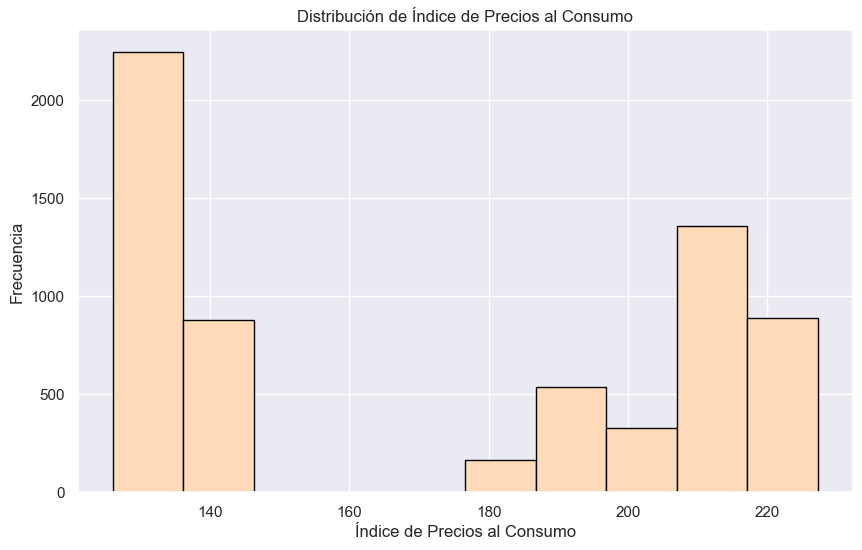

In [35]:
data = df["CPI"]
plt.figure(figsize=(10, 6))  
plt.hist(data, bins=10, edgecolor="black", color ='peachpuff')  
plt.title("Distribución de Índice de Precios al Consumo")
plt.xlabel("Índice de Precios al Consumo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [36]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("CPI"))
fig.add_trace(go.Box(y=df['CPI'], name='CPI'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja índice de precios al consumo",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se observa que no se tiene valores outliers en la columna CPI

**Revisión de Outliers en Unemployment**

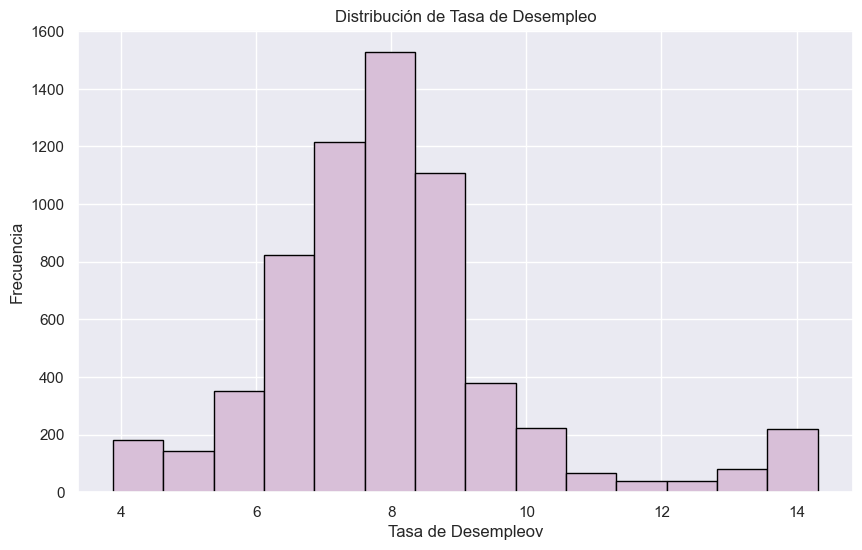

In [37]:
data = df["Unemployment"]
plt.figure(figsize=(10, 6))  
plt.hist(data, bins=14, edgecolor="black", color ='thistle')  
plt.title("Distribución de Tasa de Desempleo")
plt.xlabel("Tasa de Desempleov")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [38]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Unemployment"))
fig.add_trace(go.Box(y=df['Unemployment'], name='Unemployment'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja de Tasa de Desempleo",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se observa que se tiene valores outliers en la Tasa de Desempleo el cual se recomienda eliminarlo

In [39]:
df[df['Unemployment']< 4.3].index.to_list()

[555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 3246,
 3247,
 3248,
 3249,
 3250,
 3251,
 3252,
 3253,
 3254,
 3255,
 3256,
 3257,
 3258,
 3259,
 3260,
 3261,
 3262,
 3263,
 3264,
 3265,
 3266,
 3267,
 3268,
 3269,
 3270,
 3271,
 3272,
 3273,
 3274,
 3275,
 3276,
 3277,
 3278,
 3279,
 3280,
 3281,
 3282,
 3283,
 3284,
 3285,
 3286,
 3287,
 3288,
 5677,
 5678,
 5679,
 5680,
 5681,
 5682,
 5683,
 5684,
 5685,
 5686,
 5687,
 5688,
 5689,
 5690,
 5691,
 5692,
 5693,
 5694,
 5695,
 5696,
 5697,
 5698,
 5699,
 5700,
 5701,
 5702,
 5703,
 5704,
 5705,
 5706,
 5707,
 5708,
 5709,
 5710,
 5711,
 5712,
 5713,
 5714,
 5715,
 5716,
 5717,
 5718,
 5719]

In [40]:
df = df.drop(index =df[df['Unemployment']< 4.43].index.to_list() )

In [41]:
df = df.drop(index =df[df['Unemployment'] > 11.5].index.to_list() )

In [42]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Unemployment"))
fig.add_trace(go.Box(y=df['Unemployment'], name='Unemployment'), row=1, col=1)
fig.update_layout(
    title_text="Diagramas de caja de Tasa de Desempleo",
    showlegend=False,
    height=500,
    width=1200
)
fig.show()

>- Se puede observar que ya no se cuenta con valores outliers en la columna Tasa de Desempleo

>- Se observa que no se tiene outliers y podemos seguir con el pre procesamiento

## Preprocesamiento

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(columns = ['Date','Weekly_Sales'])
y = df[['Date','Weekly_Sales']].set_index('Date')

In [45]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [46]:
num_selector = make_column_selector(dtype_include='number')
col_nominal = make_column_selector(dtype_include='object')

In [47]:
standard_scaler = StandardScaler(with_mean=False)
nominal_encoder = OneHotEncoder()

In [48]:
col_transformer = make_column_transformer((make_pipeline(standard_scaler), num_selector),
                                          (make_pipeline(nominal_encoder,standard_scaler), col_nominal),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EB7A94D50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EB7AB0590>)])

In [49]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EB7A94D50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024EB7AB0590>)])

In [50]:
aux = col_transformer.transform(X)
df_procesado = pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pipeline-1__Store         5878 non-null   float64
 1   pipeline-1__Holiday_Flag  5878 non-null   float64
 2   pipeline-1__Temperature   5878 non-null   float64
 3   pipeline-1__Fuel_Price    5878 non-null   float64
 4   pipeline-1__CPI           5878 non-null   float64
 5   pipeline-1__Unemployment  5878 non-null   float64
 6   pipeline-2__Año_2010      5878 non-null   float64
 7   pipeline-2__Año_2011      5878 non-null   float64
 8   pipeline-2__Año_2012      5878 non-null   float64
 9   pipeline-2__Mes_1         5878 non-null   float64
 10  pipeline-2__Mes_10        5878 non-null   float64
 11  pipeline-2__Mes_11        5878 non-null   float64
 12  pipeline-2__Mes_12        5878 non-null   float64
 13  pipeline-2__Mes_2         5878 non-null   float64
 14  pipeline

Se puede observar que se escalado y procesado nuestro dataset y esta listo para usar nuestro modelos de predicción

## Modelo de predicción

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_procesado, y, test_size = 0.3, random_state = 42)

In [52]:
y_train.head()

,Weekly_Sales
Date,
2011-07-15,1785187.29
2012-01-20,594744.89
2010-11-05,270516.84
2011-07-22,360617.37
2012-08-24,718232.26


In [53]:
X_train.head()

,pipeline-1__Store,pipeline-1__Holiday_Flag,pipeline-1__Temperature,pipeline-1__Fuel_Price,pipeline-1__CPI,pipeline-1__Unemployment,pipeline-2__Año_2010,pipeline-2__Año_2011,pipeline-2__Año_2012,pipeline-2__Mes_1,...,pipeline-2__Mes_11,pipeline-2__Mes_12,pipeline-2__Mes_2,pipeline-2__Mes_3,pipeline-2__Mes_4,pipeline-2__Mes_5,pipeline-2__Mes_6,pipeline-2__Mes_7,pipeline-2__Mes_8,pipeline-2__Mes_9
217,0.152887,0.0,4.891232,7.785426,5.511840,6.451318,0.000000,2.078068,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.332829,0.000000,0.0
3288,1.911090,0.0,1.299719,7.693961,5.455961,5.719259,0.000000,0.000000,2.190218,4.369141,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5631,3.363518,0.0,2.720316,6.165186,3.242587,6.252487,2.111648,0.000000,0.000000,0.000000,...,4.414036,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
360,0.229331,0.0,4.693035,7.950934,5.608544,6.217157,0.000000,2.078068,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.332829,0.000000,0.0
5868,3.439961,0.0,3.954150,8.349461,4.905100,7.134901,0.000000,0.000000,2.190218,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.444992,0.0


**Modelo DecisionTreeRegressor**

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
decision_tree = DecisionTreeRegressor(random_state = 42, max_depth=10)


In [56]:
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [57]:
y_pred = decision_tree.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
print('Error Cuadrático Medio:', mse)


Error Cuadrático Medio: 23895012415.261673


In [59]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(f'RMSE: {rmse}')

RMSE: 154580.11649388052


In [60]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score = {r2}')

R2 Score = 0.9211299336489924


En el caso de un R^2 de 0.921:
> - Esto significa que el modelo explica el 92.1% de la variabilidad de la variable objetivo.
El 7.9% restante de la variabilidad no es explicada por el modelo y puede deberse a factores aleatorios o a variables no incluidas en el modelo.

**Modelo Linear Rgressión**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
modelo_regresion = LinearRegression()

In [63]:
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred_regresion = modelo_regresion.predict(X_test)

In [65]:
mse_regresion = mean_squared_error(y_test, y_pred_regresion)
r2_regresion = r2_score(y_test, y_pred_regresion)

In [66]:
print("Error cuadrático medio (MSE):", mse_regresion)
print("Coeficiente de determinación (R^2):", r2_regresion)

Error cuadrático medio (MSE): 263035334314.74673
Coeficiente de determinación (R^2): 0.13180148603675212


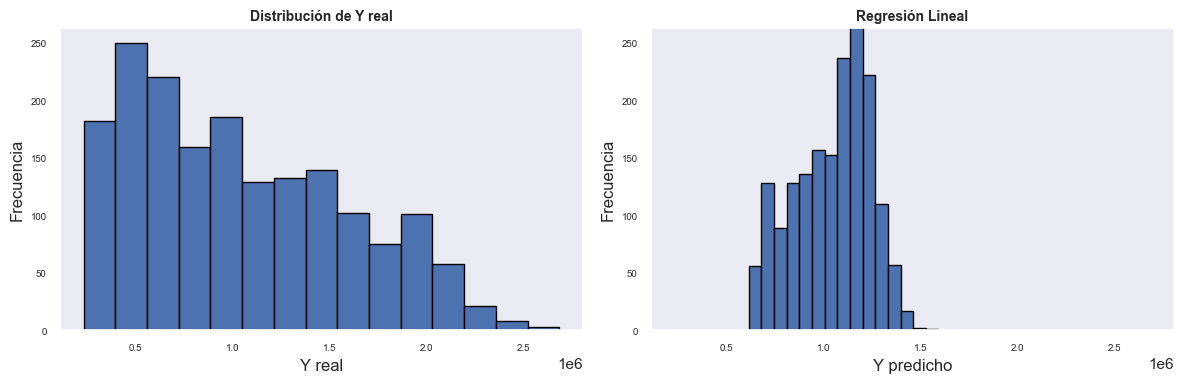

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


ax1 = plt.subplot(1,2,1)
ax1.hist(y_test, bins=15, edgecolor='black')
ax1.set_title('Distribución de Y real', fontsize=10, fontweight="bold")
ax1.set_xlabel('Y real')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(labelsize=7)
ylim_ax1 = ax1.get_ylim()
xlim_ax1 = ax1.get_xlim()

ax2 = plt.subplot(1,2,2)
ax2.hist(y_pred_regresion, bins=15, edgecolor='black')
ax2.set_title('Regresión Lineal', fontsize=10, fontweight="bold")
ax2.set_xlabel('Y predicho')
ax2.set_ylabel('Frecuencia')
ax2.tick_params(labelsize=7)
ax2.set_ylim(ylim_ax1)
ax2.set_xlim(xlim_ax1)

plt.tight_layout()
plt.show()

Se puede observar que nuestra predicción no es muy buena debido ala gráfica que se muentra, y nuestra métricas como el R^2 tiene a 0 el cual indica que nuestro modelo esta prediciendo mal

**Elección de modelo**

> Nuestro Modelo DecisionTreeRegressor vendria a ser mejor debido a las métricas que muesta esta predicciendo las ventas mejor que el otro modelo de Regresión Lineal.


En el caso de un R^2 de 0.921:
> - Esto significa que el modelo explica el 92.1% de la variabilidad de la variable objetivo.
El 7.9% restante de la variabilidad no es explicada por el modelo y puede deberse a factores aleatorios o a variables no incluidas en el modelo.

**Conclusiones**

Seee puede concluir en base del entendimiento de nuestro dataset , el analisis exploratorio, el analisi de preprocesamiento y el analisi predicctivo , que nuestro proyecto que usa el modelo de  DecisionTreeRegressor es el mejor debido a que nuestras métricas son las más optimas y por lo tomando esta prediciendo mejor las ventas que se tene en Walmart.

**Recomendaciones**

Se recomienda hacer una analisi más profundo y ala vez el uso de otro modelos asi tambien como el uso de deep Learning para una mejor predicción y sobre todo evaluar las métricas para sustentar el por que un modelo es mejor que el otro